## Sentiment Analysis Using Huggingface Pretrained Models


In [1]:
#import libraries
import collections
import emoji
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
import seaborn as sns
import os
from datasets import load_dataset
from sklearn.model_selection import train_test_split

In [2]:
#load dataset
train_df=pd.read_csv('data\Train.csv')

In [3]:
#chek the head
train_df

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
...,...,...,...,...
9996,IU0TIJDI,Living in a time where the sperm I used to was...,1.0,1.000000
9997,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.0,0.666667
9998,ST3A265H,Interesting trends in child immunization in Ok...,0.0,1.000000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000


In [4]:
#view info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


## Remove the rows with null values in the label and agreement columns of the train_df DataFrame

In [5]:
# Remove rows with null values
train_df.dropna(subset=['label', 'agreement'], inplace=True)

In [6]:
# View info once again
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   safe_text  9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


tweet_id is an object, the tweet is an object as expected while label and agreements are floats

In [7]:
#look at some of the tweets and how they are written
for tweet in range(10):
    tweet_str=train_df['safe_text'][tweet]
    print(f'{tweet_str}\n')

Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>

I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day

#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD

I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that

Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>

<user> a nearly 67 year old study when mental health studies and vaccines were relatively in their infancies that has been refuted?

Study of more than 95,000 kids finds no link between MMR vaccine and autism <url>

psa: VACCINATE YOUR FUCKING KIDS

Coughing extra on the shuttle and everyone thinks I have the measles. 😂 #VaccinateYourKids

AIDS vaccine created at Oregon Health &amp; Science University may clear virus from body - <url> <url>



## Findings
Some tweets contain hashtags, others contain numbers while others contain plain text

usernames have been replaced with < user > while links have been replaced with < url >

## Exploratory Data analysis

1. Use wordcloud to look at the most words appearing
2. Check for emojis
3. Most used words

## Visualize frequent words using wordcloud

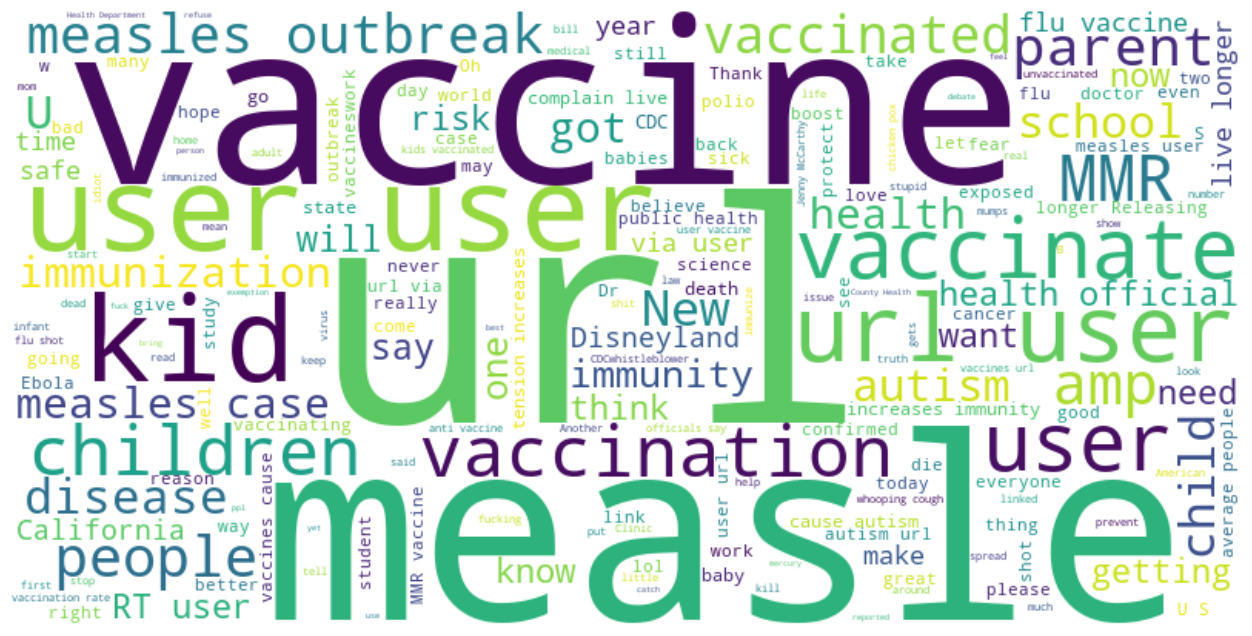

In [8]:

# Generate a word cloud from the message text data
text = " ".join(tweet for tweet in train_df.safe_text)
wordcloud = WordCloud(width=800, height=400, max_font_size=200, background_color="white").generate_from_text(text)

# Display the word cloud image
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### User and Url won't be relevant to our analysis so lets remove them

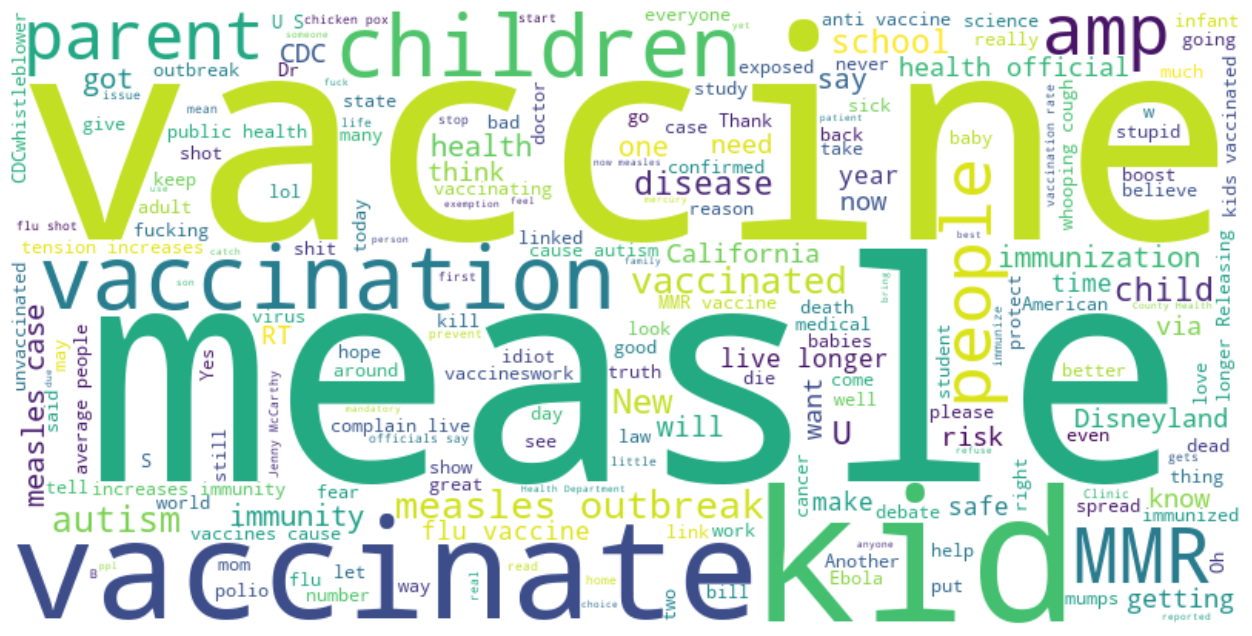

In [9]:
#replace user,url in the df
train_df['safe_text']=train_df['safe_text'].replace({'user':'','url':''},regex=True)


# regenerate wordcloud
text = " ".join(tweet for tweet in train_df.safe_text)
wordcloud = WordCloud(width=800, height=400, max_font_size=200, background_color="white").generate_from_text(text)

# Display the word cloud image
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Looks like the the vaccination is for measles and parents might be worried about their kids.
This is why we should understand the sentiment in each tweet 
to how parents feel about this vaccination.

## Let's check word Frequency again using barcharts


In [12]:
# Combine all tweets
tweets = " ".join(train_df['safe_text'].astype(str))

# Split the string into a list of words ignoring special characters
words = re.findall(r'\b\w+\b', tweets)

# Convert all words to lowercase
words = [word.lower() for word in words]

# Count the occurrences of each word using Counter
word_counts = collections.Counter(words)

# Combine words that differ only with 's' at the end
combined_words = []
for word in words:
    if word.endswith('s') and len(word) > 1:
        singular_word = word[:-1]
        if singular_word in word_counts:
            combined_words.append(singular_word)
        else:
            combined_words.append(word)
    else:
        combined_words.append(word)

# Recount the occurrences of each word using Counter
word_counts = collections.Counter(combined_words)

# Get the top 20 most common words and their counts
top_words = dict(word_counts.most_common(20))

top_words

{'the': 4138,
 'i': 3858,
 'to': 3682,
 'measle': 3575,
 'vaccine': 3031,
 'a': 2871,
 'of': 2359,
 'in': 2181,
 'and': 2007,
 'for': 1612,
 'kid': 1466,
 't': 1419,
 's': 1402,
 'you': 1333,
 'it': 1228,
 'health': 1159,
 'that': 1109,
 'your': 1081,
 'vaccination': 1073,
 'mmr': 1023}

## Visualize word frequency using bar chart

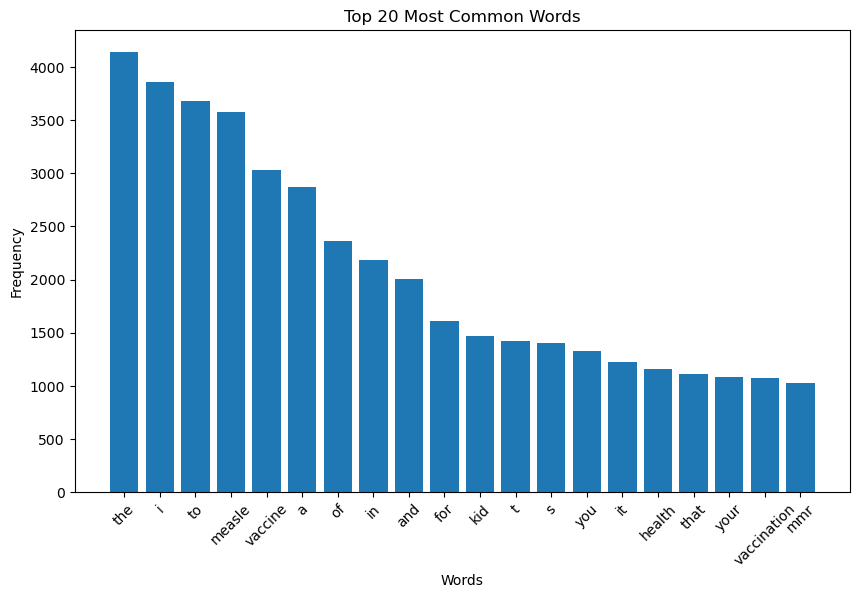

In [13]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

## Check for the presence of Emojis: Emojis are a fundamental part of tweeting today

In [14]:
 #Function to extract all emojis from a text
def extract_emojis(tweet):
    return ''.join(E for E in tweet if E in emoji.EMOJI_DATA)


# Extract all emojis from the message text data
emojis = extract_emojis(tweets)



- As expected we do have some emojis in our text
- We can decide to fine tune algorithms that can handle emojis

In [15]:

# Create a list of all the extracted emojis
emojis_list = list(emojis)

# Count the frequency of each emoji in the list
emoji_dict = dict(collections.Counter(emojis_list))

# Sort the dictionary in descending order of frequency
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

# Convert the dictionary to a pandas DataFrame
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])

# Display the top 20 most frequently used emojis
print(emoji_df.head(10))


  emoji  count
0     😂    140
1     💉     63
2     😷     58
3     🔥     52
4     😭     40
5     😳     39
6     💥     30
7     😒     29
8     🙌     27
9     👏     25


- The most frequently used emoji is 😂 with a count of 140. This emoji is commonly associated with laughter or amusement.

- The second most frequently used emoji is 💉 with a count of 63. This emoji represents a syringe and is often used in the context of healthcare, vaccinations, or medical topics.

- The third most frequently used emoji is 😷 with a count of 58. This emoji depicts a face wearing a medical mask and is commonly used to represent sickness, health precautions, or protection.

## Visualize the top 10 most use

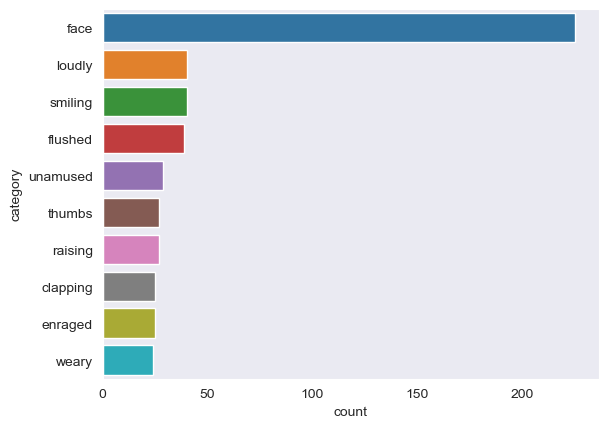

In [16]:
# Group the emojis by category
emoji_dict = collections.defaultdict(int)
for emoji_char in emojis_list:
    emoji_desc = emoji.demojize(emoji_char, delimiters=("", ""))
    emoji_desc_parts = emoji_desc.split("_")
    if len(emoji_desc_parts) > 1:
        emoji_category = emoji_desc_parts[0]
        emoji_dict[emoji_category] += 1

# Convert the dictionary to a pandas DataFrame
emoji_df = pd.DataFrame(emoji_dict.items(), columns=['category', 'count'])

# Sort the DataFrame by frequency count in descending order
emoji_df = emoji_df.sort_values(by='count', ascending=False)

# Select the top 10 rows
top_10_emojis = emoji_df.head(10)
sns.set_style('dark')
sns.barplot(x='count',y='category',data=emoji_df.head(10));

## Distribution of Sentiment Labels

In [17]:
# Calculate the frequency of each sentiment label
label_counts = train_df['label'].value_counts()
label_counts

 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64

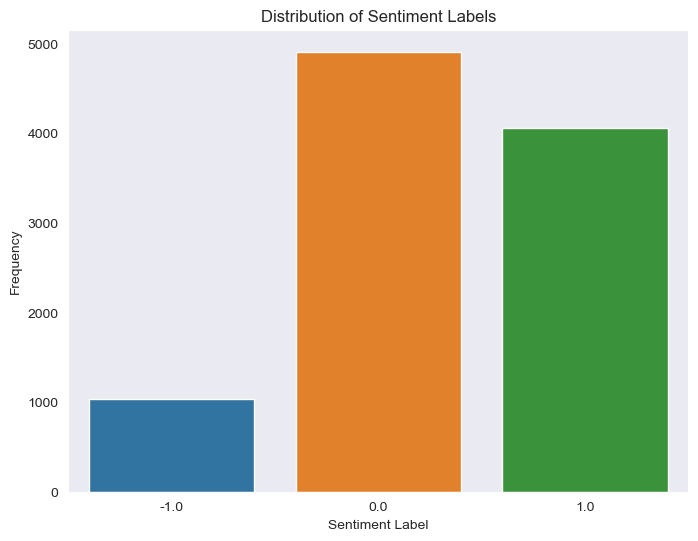

In [18]:
train_df['label'] = train_df['label'].astype('category')
# Create a bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=train_df['label'].value_counts().index, y=train_df['label'].value_counts().values)
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Labels')
plt.show()

**The labels are not perfectly balanced, as there is some variation in the frequencies. However, the difference between the frequencies of the labels is not extremely large, which suggests a relatively balanced distribution.**

## To perform text length analysis on the "safe_text" column

In [19]:
# Calculate the length of each text in the "safe_text" column
text_lengths = train_df['safe_text'].apply(len)

# Compute descriptive statistics of text lengths
text_length_stats = text_lengths.describe()

# Print the descriptive statistics
print(text_length_stats)

count    9999.000000
mean       96.363836
std        30.090941
min         3.000000
25%        75.000000
50%       103.000000
75%       119.000000
max       153.000000
Name: safe_text, dtype: float64


## Visualize the distribution of text lengths using histograms or box plots.

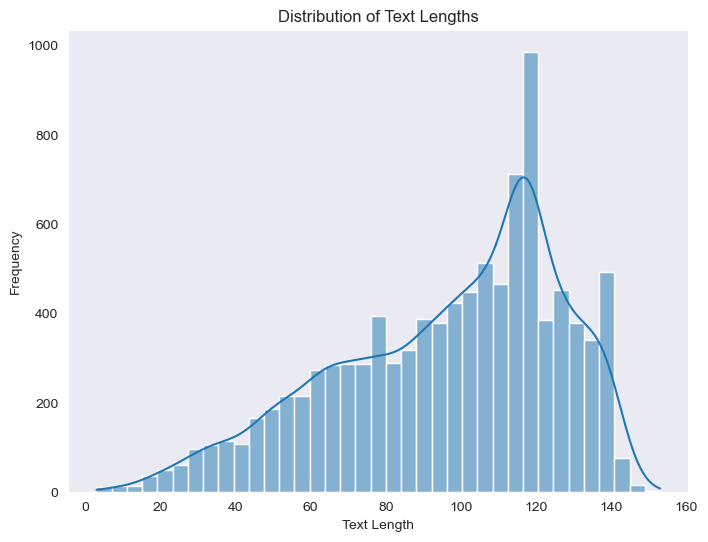

In [20]:
# Create a histogram to visualize the distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(text_lengths, kde=True)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

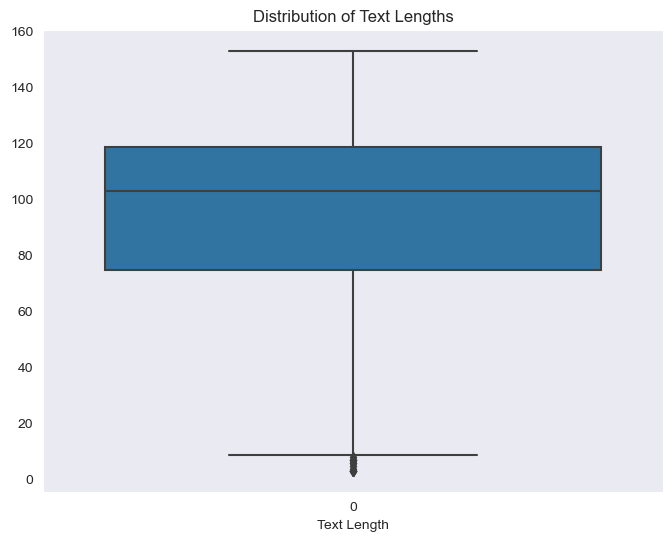

In [21]:
# Create a box plot to visualize the distribution of text lengths
plt.figure(figsize=(8, 6))
sns.boxplot(text_lengths)
plt.xlabel('Text Length')
plt.title('Distribution of Text Lengths')
plt.show()

## Perform agreement analysis on the data

In [22]:
# Calculate descriptive statistics for the "agreement" column
agreement_mean = train_df['agreement'].mean()
agreement_median = train_df['agreement'].median()
agreement_std = train_df['agreement'].std()

# Print the results
print("Agreement Mean:", agreement_mean)
print("Agreement Median:", agreement_median)
print("Agreement Standard Deviation:", agreement_std)

Agreement Mean: 0.8542520918758542
Agreement Median: 1.0
Agreement Standard Deviation: 0.1807071980577538


## Visualize the distribution of the "agreement" values using a histogram:

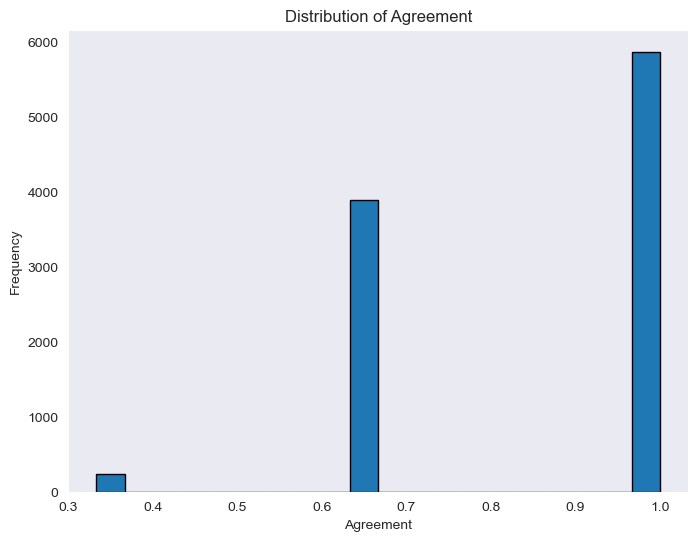

In [23]:
# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(train_df['agreement'], bins=20, edgecolor='black')
plt.xlabel('Agreement')
plt.ylabel('Frequency')
plt.title('Distribution of Agreement')
plt.show()

## Visualize the distribution of the "agreement" values using  a box plot:

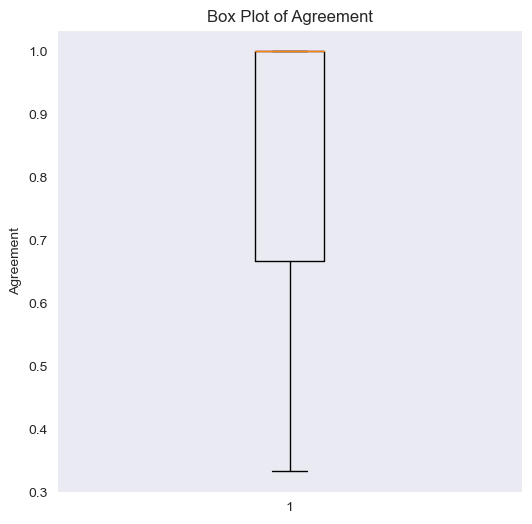

In [24]:
# Plot a box plot
plt.figure(figsize=(6, 6))
plt.boxplot(train_df['agreement'])
plt.ylabel('Agreement')
plt.title('Box Plot of Agreement')
plt.show()

 Overall, the high mean and median agreement values, along with the low standard deviation, suggest a generally high level of consensus among annotators in the sentiment annotations. This is a positive indication for the reliability and consistency of the sentiment labels in the dataset.

## Counting the sentiment labels within each agreement level category

In [25]:
# Counting the sentiment labels within each agreement level category
label_counts = train_df.groupby('agreement')['label'].value_counts()

# Printing the label counts for each agreement level category
for agreement, counts in label_counts.groupby(level=0):
    print(f"Agreement Level: {agreement}")
    print(counts)
    print('\n')

Agreement Level: 0.3333333333333333
agreement  label
0.333333   -1.0     239
           0.0        0
           1.0        0
Name: label, dtype: int64


Agreement Level: 0.6666666666666666
agreement  label
0.666667   0.0      1748
           1.0      1729
           -1.0      417
Name: label, dtype: int64


Agreement Level: 1.0
agreement  label
1.0        0.0      3160
           1.0      2324
           -1.0      382
Name: label, dtype: int64




These results show the count of sentiment labels within each agreement level category. It appears that the majority of tweets with an agreement level of 0.6666666666666666 have both neutral and positive sentiment labels, while the agreement level of 1.0 has a higher count of neutral sentiment labels compared to negative and positive sentiments. On the other hand, the agreement level of 0.3333333333333333 primarily consists of negative sentiment labels.

## Visualize the distribution of sentiment labels based on the agreement level among annotators

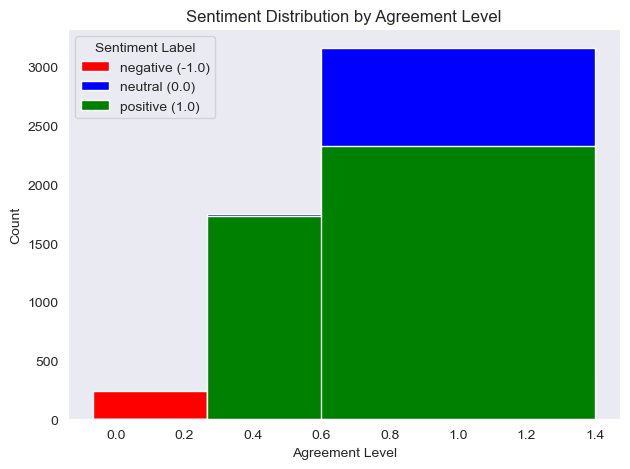

In [29]:
# Counting the sentiment labels within each agreement level category
label_counts = train_df.groupby(['agreement', 'label']).size().unstack()

# Plotting the distribution
fig, ax = plt.subplots()
agreement_levels = label_counts.index
labels = label_counts.columns
colors = ['red', 'blue', 'green']
sentiment_labels = ['negative', 'neutral', 'positive']

for i, sentiment_label in enumerate(labels):
    counts = label_counts[sentiment_label].fillna(0)
    ax.bar(agreement_levels, counts, label=f'{sentiment_labels[i]} ({sentiment_label})', color=colors[i])

ax.set_xlabel('Agreement Level')
ax.set_ylabel('Count')
ax.legend(title='Sentiment Label')

plt.title('Sentiment Distribution by Agreement Level')
plt.tight_layout()
plt.show()

The plot shows the aggregates of the sentiment labels based on the agreement level using the groupby function and showing the distribution. Each sentiment label is represented by a different color, and the legend indicates the corresponding sentiment label.

##  Analyze the association between the sentiment labels and multiple keywords "measle", "measles", "vaccine", "vaccines", "vaccination", and "health"

The code below adds two new columns, 'measles_combined' and 'vaccines_combined', to the train_df DataFrame, which contain the combined occurrences of 'measle' and 'measles', and 'vaccine' and 'vaccines', respectively. The keywords_updated list is also updated to include these combined columns. The keyword_frequencies DataFrame is then calculated based on the updated keywords.

In [45]:
# Create keyword columns
keywords = ['measle', 'measles', 'vaccine', 'vaccines', 'vaccination', 'health']
for keyword in keywords:
    train_df[keyword] = train_df['safe_text'].str.contains(keyword, case=False).astype(int)

# Combine occurrences of 'measle' and 'measles'
train_df['measles_combined'] = train_df['measle'] + train_df['measles']

# Combine occurrences of 'vaccine' and 'vaccines'
train_df['vaccines_combined'] = train_df['vaccine'] + train_df['vaccines']

# Update the keyword list
keywords_updated = ['measles_combined', 'vaccines_combined', 'vaccination', 'health']

# Group the data by sentiment label and calculate keyword frequencies
keyword_frequencies = train_df.groupby('label')[keywords_updated].sum()

# Print the keyword frequencies
keyword_frequencies

,measles_combined,vaccines_combined,vaccination,health
label,,,,
-1.0,210,968,145,70
0.0,4588,1104,298,705
1.0,1875,2406,606,431


## Keyword Frequencies by Sentiment Label

The chart allows us to compare the distribution and relative frequencies of keywords across different sentiment categories.

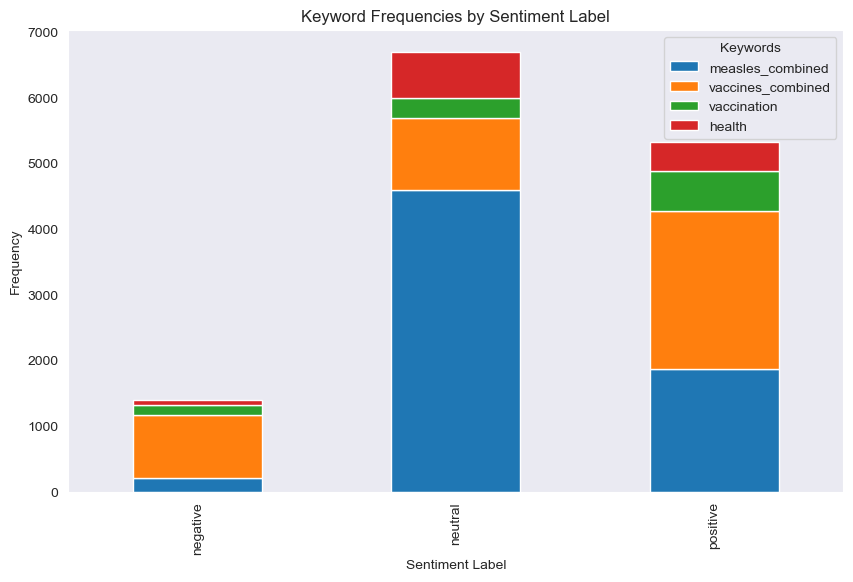

In [46]:
# Set the labels for the sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']

# Plot the stacked bar chart
keyword_frequencies.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Keyword Frequencies by Sentiment Label')

# Show the legend
plt.legend(title='Keywords')

# Set the x-axis tick labels as the sentiment labels
plt.xticks(range(len(sentiment_labels)), sentiment_labels)

# Show the plot
plt.show()

From the plot, we cann summarize that:
- The words "measle(s)" are used most (over 4500 times) in the **neutral** sentiment label followed 2nd by "vaccine(s)" and 3rd by word "health".
- The words "vaccine(s)" are used most (about 2000 times) in the **positive** sentiment label followed 2nd by "measle(s)" and 3rd by word "vacciation".
- The words "vaccine(s)" are used most (about 1000 times) in the **negative** sentiment label followed 2nd by "measle(s)" and 3rd by word "vacciation".